In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

import FinanceDataReader as fdr

from datetime import timedelta

import warnings
warnings.filterwarnings(action='ignore')

# 1. Data 가져오기 / 전처리

## Upbit가격, 환율 정보 가져오기

In [2]:
usd = fdr.DataReader('USD/KRW', '1995-01-01')
df_upbit = pd.read_csv('./upbit_daily.csv', index_col=0)

In [3]:
df_upbit

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-ZIL,2020-10-05T00:00:00,2020-10-05T09:00:00,24.9,25.5,23.4,24.0,2020-10-05 23:59:00.601,1.224960e+09,5.061292e+07,24.9,-0.9,-0.036145
1,KRW-ZIL,2020-10-04T00:00:00,2020-10-04T09:00:00,21.8,25.2,21.4,24.9,2020-10-04 23:59:55.713,1.229447e+09,5.322311e+07,21.8,3.1,0.142202
2,KRW-ZIL,2020-10-03T00:00:00,2020-10-03T09:00:00,21.2,23.0,20.4,21.8,2020-10-03 23:58:13.870,7.225800e+08,3.318310e+07,21.2,0.6,0.028302
3,KRW-ZIL,2020-10-02T00:00:00,2020-10-02T09:00:00,22.8,22.9,19.4,21.2,2020-10-02 23:56:59.685,2.149693e+09,1.040192e+08,22.8,-1.6,-0.070175
4,KRW-ZIL,2020-10-01T00:00:00,2020-10-01T09:00:00,22.8,24.1,21.3,22.8,2020-10-01 23:57:06.681,1.313784e+09,5.839854e+07,22.9,-0.1,-0.004367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,KRW-XTZ,2021-04-28T00:00:00,2021-04-28T09:00:00,6400.0,6580.0,5905.0,6135.0,2021-04-28 23:59:44.590,2.165054e+10,3.478625e+06,6400.0,-265.0,-0.041406
196,KRW-XTZ,2021-04-27T00:00:00,2021-04-27T09:00:00,6200.0,6435.0,6075.0,6400.0,2021-04-27 23:59:59.491,2.548068e+10,4.046449e+06,6205.0,195.0,0.031426
197,KRW-XTZ,2021-04-26T00:00:00,2021-04-26T09:00:00,5450.0,6235.0,5300.0,6205.0,2021-04-27 00:00:00.448,2.613041e+10,4.434185e+06,5445.0,760.0,0.139578
198,KRW-XTZ,2021-04-25T00:00:00,2021-04-25T09:00:00,5410.0,5820.0,5100.0,5445.0,2021-04-25 23:59:56.396,1.783660e+10,3.223416e+06,5410.0,35.0,0.006470


## Investing.com 정보 가져오기

In [4]:
investing_dir = './investing_data/'
investing_paths = os.listdir(investing_dir)

In [5]:
investing_list = []

for path in investing_paths :
    temp_df = pd.read_csv(investing_dir + path, index_col='Date',  parse_dates=True)
    temp_df['Name'] = path[:-36]
    temp_df.sort_index(inplace=True)
    investing_list.append(temp_df)

In [6]:
df_investing = pd.concat(investing_list)

In [7]:
df_investing

,Price,Open,High,Low,Vol.,Change %,Name
Date,,,,,,,
2017-12-31,0.71,0.59,0.74,0.59,17.22M,20.34%,Cardano
2018-01-01,0.7022,0.71,0.715,0.632,17.95M,-1.10%,Cardano
2018-01-02,0.762,0.7022,0.8,0.675,10.97M,8.52%,Cardano
2018-01-03,1.08,0.9782,1.09,0.8882,20.23M,41.73%,Cardano
2018-01-04,1.1043,1.1,1.35,1.05,19.60M,2.25%,Cardano
...,...,...,...,...,...,...,...
2021-11-29,205.5,199.6,209.3,195.4,811.22K,2.96%,Litecoin
2021-11-30,208.1,205.6,218.9,197.5,1.03M,1.27%,Litecoin
2021-12-01,208.8,207.8,217.6,205.6,674.03K,0.34%,Litecoin


## 가상화폐 이름과 Code 연결

In [8]:
name_list = ['Algorand', 'Axie Infinity', 'Bitcoin Cash', 'Bitcoin', 'Cardano', 'Chainlink', 'Cosmos',\
            'Crypto.com Coin', 'Decentraland', 'Dogecoin', 'Ethereum Classic', 'Ethereum', 'Hedera', 'Litecoin',\
            'Polkadot', 'Polygon', 'Solana', 'Stellar', 'TerraUSD', 'Tezos', 'The Sandbox', 'THETA',\
            'TRON', 'VeChain', 'XRP']
code_list = ['ALGO', 'AXS', 'BTH', 'BTC', 'ADA', 'LINK', 'ATOM', 'CRO', 'MANA', 'DOGE', 'ETC', 'ETH', 'HBAR', 'LTC',\
            'DOT', 'MATIC', 'SOL', 'XLM', 'UST', 'XTZ', 'SAND', 'THETA', 'TRX', 'VET', 'XRP']

In [9]:
len(name_list), len(code_list)

(25, 25)

In [10]:
code_dict = {
    'Name' : name_list,
    'Code' : code_list
}

In [11]:
df_codes = pd.DataFrame(code_dict)

In [12]:
df_codes

,Name,Code
0,Algorand,ALGO
1,Axie Infinity,AXS
2,Bitcoin Cash,BTH
3,Bitcoin,BTC
4,Cardano,ADA
5,Chainlink,LINK
6,Cosmos,ATOM
7,Crypto.com Coin,CRO
8,Decentraland,MANA
9,Dogecoin,DOGE


In [13]:
df_investing.reset_index(inplace=True)
df_investing = pd.merge(df_investing, df_codes, on='Name', how='outer')
df_investing.set_index('Date', inplace=True)

In [14]:
df_upbit['Code'] = df_upbit.market.apply(lambda x : x.split('-')[1])
df_upbit = pd.merge(df_upbit, df_codes, on='Code', how='left')

In [15]:
df_upbit.columns

Index(['market', 'candle_date_time_utc', 'candle_date_time_kst',
       'opening_price', 'high_price', 'low_price', 'trade_price', 'timestamp',
       'candle_acc_trade_price', 'candle_acc_trade_volume',
       'prev_closing_price', 'change_price', 'change_rate', 'Code', 'Name'],
      dtype='object')

In [16]:
upbit_columns = ['candle_date_time_utc', 'opening_price', 'high_price', 'low_price', 'trade_price',
       'candle_acc_trade_price', 'Code', 'Name']
df_upbit = df_upbit[upbit_columns]

In [17]:
df_upbit.columns = ['Date', 'Open', 'High', 'Low', 'Price',
       'Volume', 'Code', 'Name']

In [18]:
df_upbit['Date'] = pd.to_datetime(df_upbit.Date)
df_upbit.set_index('Date', inplace=True)

In [19]:
df_upbit

,Open,High,Low,Price,Volume,Code,Name
Date,,,,,,,
2020-10-05,24.9,25.5,23.4,24.0,1.224960e+09,ZIL,NaN
2020-10-04,21.8,25.2,21.4,24.9,1.229447e+09,ZIL,NaN
2020-10-03,21.2,23.0,20.4,21.8,7.225800e+08,ZIL,NaN
2020-10-02,22.8,22.9,19.4,21.2,2.149693e+09,ZIL,NaN
2020-10-01,22.8,24.1,21.3,22.8,1.313784e+09,ZIL,NaN
...,...,...,...,...,...,...,...
2021-04-28,6400.0,6580.0,5905.0,6135.0,2.165054e+10,XTZ,Tezos
2021-04-27,6200.0,6435.0,6075.0,6400.0,2.548068e+10,XTZ,Tezos
2021-04-26,5450.0,6235.0,5300.0,6205.0,2.613041e+10,XTZ,Tezos


In [20]:
df_investing

,Price,Open,High,Low,Vol.,Change %,Name,Code
Date,,,,,,,,
2017-12-31,0.71,0.59,0.74,0.59,17.22M,20.34%,Cardano,ADA
2018-01-01,0.7022,0.71,0.715,0.632,17.95M,-1.10%,Cardano,ADA
2018-01-02,0.762,0.7022,0.8,0.675,10.97M,8.52%,Cardano,ADA
2018-01-03,1.08,0.9782,1.09,0.8882,20.23M,41.73%,Cardano,ADA
2018-01-04,1.1043,1.1,1.35,1.05,19.60M,2.25%,Cardano,ADA
...,...,...,...,...,...,...,...,...
2021-11-29,205.5,199.6,209.3,195.4,811.22K,2.96%,Litecoin,LTC
2021-11-30,208.1,205.6,218.9,197.5,1.03M,1.27%,Litecoin,LTC
2021-12-01,208.8,207.8,217.6,205.6,674.03K,0.34%,Litecoin,LTC


## 가상화폐 Code를 중심으로 Upbit, Investing.com 가격, 환율 병합

In [21]:
%%time
left_columns = ['Price', 'Volume']
right_columns = ['Price', 'Code', 'Name']
merged_df = []
for name in df_investing.Code.unique():
    
    left = df_upbit[df_upbit.Code == name][left_columns]
    right = df_investing[df_investing.Code == name][right_columns]
    
    temp = pd.merge(left, right, how='inner', suffixes=('_upbit', '_investing'),
            left_index=True, right_index=True)
    
    temp = pd.merge(temp, usd.Close, how='left', left_index=True, right_index=True)
    
    temp.sort_index(inplace=True)
    merged_df.append(temp)

CPU times: user 183 ms, sys: 3.72 ms, total: 187 ms
Wall time: 188 ms


In [22]:
merged_df = pd.concat(merged_df)

In [23]:
merged_df.columns = ['Price_upbit', 'Volume', 'Price_investing', 'Code', 'Name', 'Exchange_rate']

In [24]:
merged_df

,Price_upbit,Volume,Price_investing,Code,Name,Exchange_rate
Date,,,,,,
2017-12-31,986.0,8.740969e+11,0.71,ADA,Cardano,NaN
2018-01-01,987.0,5.195622e+11,0.7022,ADA,Cardano,1066.60
2018-01-02,1050.0,4.955807e+11,0.762,ADA,Cardano,1063.21
2018-01-03,1545.0,9.290652e+11,1.08,ADA,Cardano,1064.80
2018-01-04,1755.0,8.579506e+11,1.1043,ADA,Cardano,1062.28
...,...,...,...,...,...,...
2021-11-05,242000.0,1.422169e+10,200.279,LTC,Litecoin,1181.05
2021-11-06,239700.0,9.962796e+09,197.6,LTC,Litecoin,NaN
2021-11-07,244700.0,8.479420e+09,201.9,LTC,Litecoin,NaN


# 2. EDA

## 휴일 환율데이터 및 investing.com 가격 데이터 타입 처리

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18233 entries, 2017-12-31 to 2021-11-09
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price_upbit      18233 non-null  float64
 1   Volume           18233 non-null  float64
 2   Price_investing  18233 non-null  object 
 3   Code             18233 non-null  object 
 4   Name             18233 non-null  object 
 5   Exchange_rate    13031 non-null  float64
dtypes: float64(3), object(3)
memory usage: 997.1+ KB


In [26]:
merged_df.ffill(inplace=True)
merged_df['Price_investing'] = merged_df.Price_investing.apply(lambda x : pd.to_numeric(str(x).replace(',', '')))
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18233 entries, 2017-12-31 to 2021-11-09
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price_upbit      18233 non-null  float64
 1   Volume           18233 non-null  float64
 2   Price_investing  18233 non-null  float64
 3   Code             18233 non-null  object 
 4   Name             18233 non-null  object 
 5   Exchange_rate    18232 non-null  float64
dtypes: float64(4), object(2)
memory usage: 997.1+ KB


## 코인별 데이터 수 확인

In [27]:
for code in merged_df.Code.unique():
    temp = merged_df[merged_df.Code == code]
    print('----------', code, '----------')
    print('Data Len:', len(temp))
    print('Start Date:', temp.index[0])
    print('End Date:', temp.index[-1])
    print('Mean Price:', temp.Price_upbit.mean())
    print('std:', temp.Price_upbit.std())
    print('Min Price:', temp.Price_upbit.min())
    print('Max Price:', temp.Price_upbit.max())
    print('Max / Min :', round(temp.Price_upbit.max() / temp.Price_upbit.min(), 2))
    print('Price:', temp.Price_upbit[-1])
    print()

---------- ADA ----------
Data Len: 1410
Start Date: 2017-12-31 00:00:00
End Date: 2021-11-09 00:00:00
Mean Price: 503.0594326241135
std: 795.6739531197469
Min Price: 30.7
Max Price: 3450.0
Max / Min : 112.38
Price: 2735.0

---------- XTZ ----------
Data Len: 463
Start Date: 2020-08-04 00:00:00
End Date: 2021-11-09 00:00:00
Mean Price: 4553.034557235421
std: 2093.1907030057087
Min Price: 2065.0
Max Price: 10570.0
Max / Min : 5.12
Price: 7605.0

---------- XRP ----------
Data Len: 1504
Start Date: 2017-09-25 00:00:00
End Date: 2021-11-09 00:00:00
Mean Price: 591.5019946808511
std: 495.8606770460793
Min Price: 179.0
Max Price: 4380.0
Max / Min : 24.47
Price: 1515.0

---------- XLM ----------
Data Len: 1504
Start Date: 2017-09-25 00:00:00
End Date: 2021-11-09 00:00:00
Mean Price: 226.70106382978724
std: 184.70750652387153
Min Price: 13.1
Max Price: 1220.0
Max / Min : 93.13
Price: 496.0

---------- DOGE ----------
Data Len: 259
Start Date: 2021-02-24 00:00:00
End Date: 2021-11-09 00:00:00


## 코인별 상관관계 확인

In [28]:
# upbit 코인 병합
code_list = merged_df.Code.unique()
concat_series = []
for code in code_list :
    temp_df = merged_df[merged_df.Code == code]
    concat_series.append(pd.Series(temp_df['Price_upbit'].pct_change().values, index=temp_df.index.values, name=code))

upbit_merged = pd.DataFrame()
    
for i in concat_series:
    upbit_merged = pd.merge(upbit_merged, i, left_index=True, right_index=True, how='outer')

In [29]:
# investing 코인 병합
code_list = merged_df.Code.unique()
concat_series = []
for code in code_list :
    temp_df = merged_df[merged_df.Code == code]
    concat_series.append(pd.Series(temp_df['Price_investing'].pct_change().values, index=temp_df.index.values, name=code))

investing_merged = pd.DataFrame()
    
for i in concat_series:
    investing_merged = pd.merge(investing_merged, i, left_index=True, right_index=True, how='outer')

In [30]:
upbit_merged

,ADA,XTZ,XRP,XLM,DOGE,ATOM,MATIC,AXS,ETC,SAND,...,VET,SOL,BTC,ETH,TRX,CRO,THETA,DOT,MANA,LTC
2017-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-26,NaN,NaN,0.039409,0.053435,NaN,NaN,NaN,NaN,0.061983,NaN,...,NaN,NaN,-0.000231,-0.010769,NaN,NaN,NaN,NaN,NaN,0.012216
2017-09-27,NaN,NaN,0.099526,0.152174,NaN,NaN,NaN,NaN,0.108949,NaN,...,NaN,NaN,0.077760,0.065319,NaN,NaN,NaN,NaN,NaN,0.082759
2017-09-28,NaN,NaN,-0.043103,-0.050314,NaN,NaN,NaN,NaN,0.017544,NaN,...,NaN,NaN,-0.015246,-0.029197,NaN,NaN,NaN,NaN,NaN,-0.042994
2017-09-29,NaN,NaN,-0.009009,-0.026490,NaN,NaN,NaN,NaN,-0.024138,NaN,...,NaN,NaN,0.015482,-0.015038,NaN,NaN,NaN,NaN,NaN,-0.016639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,0.010460,0.030739,-0.027682,-0.013363,0.006329,-0.007311,0.002169,0.054046,-0.001237,-0.040062,...,0.049180,-0.034263,0.004254,-0.001835,0.000000,0.335277,-0.009140,-0.025193,0.046512,-0.008197
2021-11-06,0.006211,-0.007614,-0.007117,-0.006772,-0.003145,-0.019862,-0.008658,0.035269,-0.007120,0.051364,...,0.010417,0.091130,0.006125,0.006618,-0.008000,-0.109170,0.005969,0.001268,0.084127,-0.009504
2021-11-07,0.006173,-0.012788,0.060932,0.013636,0.015773,-0.014117,-0.002183,0.019392,0.020889,-0.006107,...,-0.025773,-0.036978,0.026296,0.020270,0.016129,0.044118,-0.026429,0.001425,0.001464,0.020859
2021-11-08,0.047035,0.015544,0.043919,0.031390,0.059006,0.020323,0.000000,-0.049100,0.042602,-0.046083,...,0.121693,-0.007282,0.063591,0.039019,0.055556,0.107981,0.051524,0.017236,-0.051170,0.126890


In [31]:
investing_merged

,ADA,XTZ,XRP,XLM,DOGE,ATOM,MATIC,AXS,ETC,SAND,...,VET,SOL,BTC,ETH,TRX,CRO,THETA,DOT,MANA,LTC
2017-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-26,NaN,NaN,0.024919,0.026578,NaN,NaN,NaN,NaN,0.044545,NaN,...,NaN,NaN,-0.010196,-0.020054,NaN,NaN,NaN,NaN,NaN,0.002298
2017-09-27,NaN,NaN,0.109408,0.169094,NaN,NaN,NaN,NaN,0.127937,NaN,...,NaN,NaN,0.082077,0.070762,NaN,NaN,NaN,NaN,NaN,0.086741
2017-09-28,NaN,NaN,-0.036208,-0.051903,NaN,NaN,NaN,NaN,0.021605,NaN,...,NaN,NaN,-0.003941,-0.022986,NaN,NaN,NaN,NaN,NaN,-0.035338
2017-09-29,NaN,NaN,-0.027682,-0.031387,NaN,NaN,NaN,NaN,-0.040785,NaN,...,NaN,NaN,-0.005434,-0.032945,NaN,NaN,NaN,NaN,NaN,-0.041006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,-0.001059,0.020104,-0.035923,-0.029510,-0.010380,-0.020761,-0.011387,0.044719,-0.006086,-0.053374,...,0.036803,-0.044496,-0.007137,-0.013254,0.000822,0.307639,-0.020105,-0.038891,0.034338,-0.012168
2021-11-06,0.011607,-0.007106,-0.006138,0.000251,0.002971,-0.015493,-0.006466,0.037335,-0.008262,0.058265,...,0.014502,0.094560,0.008358,0.009466,-0.009455,-0.102961,-0.013445,0.004309,0.085041,-0.013376
2021-11-07,0.006984,-0.008679,0.057940,0.012873,0.017720,-0.014909,0.000011,0.020092,0.021011,-0.005780,...,-0.035443,-0.034173,0.029102,0.020964,0.019677,0.043711,-0.002399,0.004021,0.004305,0.021761
2021-11-08,0.053059,0.017121,0.052508,0.039669,0.059974,0.026906,0.004438,-0.044244,0.049129,-0.041738,...,0.132390,-0.004907,0.067243,0.042567,0.052378,0.117949,0.055986,0.022154,-0.045875,0.133730


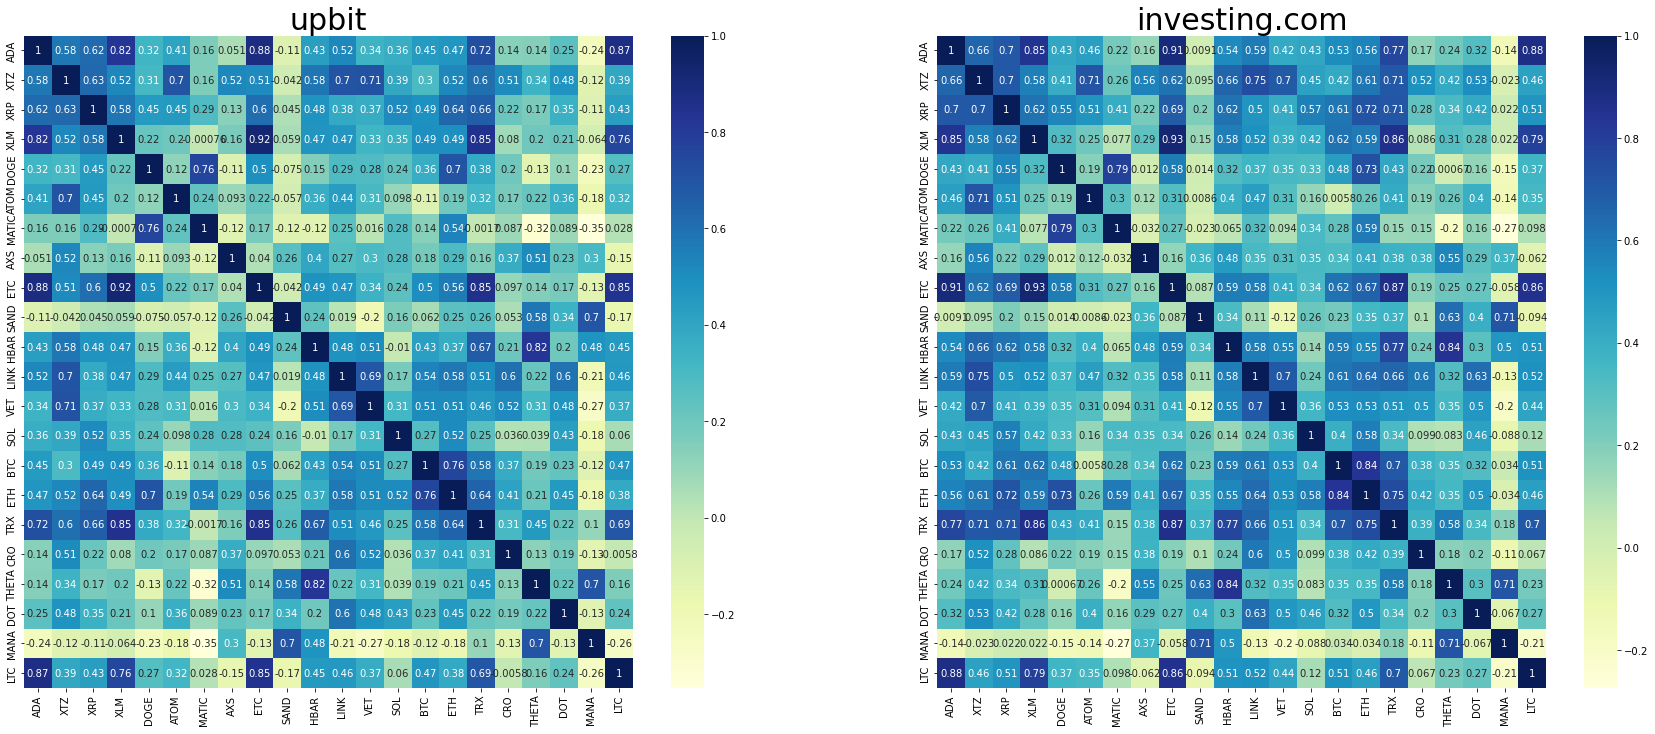

In [32]:
plt.figure(figsize=(30,12))
plt.subplot(1, 2, 1)
sns.heatmap(upbit_merged.dropna().corr(), annot=True, cmap='YlGnBu')
plt.title('upbit', fontdict={'fontsize': 30})

plt.subplot(1, 2, 2)
sns.heatmap(investing_merged.dropna().corr(), annot=True, cmap='YlGnBu')
plt.title('investing.com', fontdict={'fontsize': 30})
plt.show()

## Upbit와 Investing.com 가격 차이 확인

In [33]:
merged_df['Price_inves_won'] = merged_df['Price_investing'] * merged_df['Exchange_rate']

In [34]:
merged_df[merged_df.Code == 'ADA']

,Price_upbit,Volume,Price_investing,Code,Name,Exchange_rate,Price_inves_won
Date,,,,,,,
2017-12-31,986.0,8.740969e+11,0.7100,ADA,Cardano,NaN,NaN
2018-01-01,987.0,5.195622e+11,0.7022,ADA,Cardano,1066.60,748.966520
2018-01-02,1050.0,4.955807e+11,0.7620,ADA,Cardano,1063.21,810.166020
2018-01-03,1545.0,9.290652e+11,1.0800,ADA,Cardano,1064.80,1149.984000
2018-01-04,1755.0,8.579506e+11,1.1043,ADA,Cardano,1062.28,1173.075804
...,...,...,...,...,...,...,...
2021-11-05,2415.0,4.391241e+10,1.9815,ADA,Cardano,1181.05,2340.250575
2021-11-06,2430.0,3.484482e+10,2.0045,ADA,Cardano,1181.05,2367.414725
2021-11-07,2445.0,3.108726e+10,2.0185,ADA,Cardano,1181.05,2383.949425


In [35]:
merged_df.Code.unique()

array(['ADA', 'XTZ', 'XRP', 'XLM', 'DOGE', 'ATOM', 'MATIC', 'AXS', 'ETC',
       'SAND', 'HBAR', 'LINK', 'VET', 'SOL', 'BTC', 'ETH', 'TRX', 'CRO',
       'THETA', 'DOT', 'MANA', 'LTC'], dtype=object)

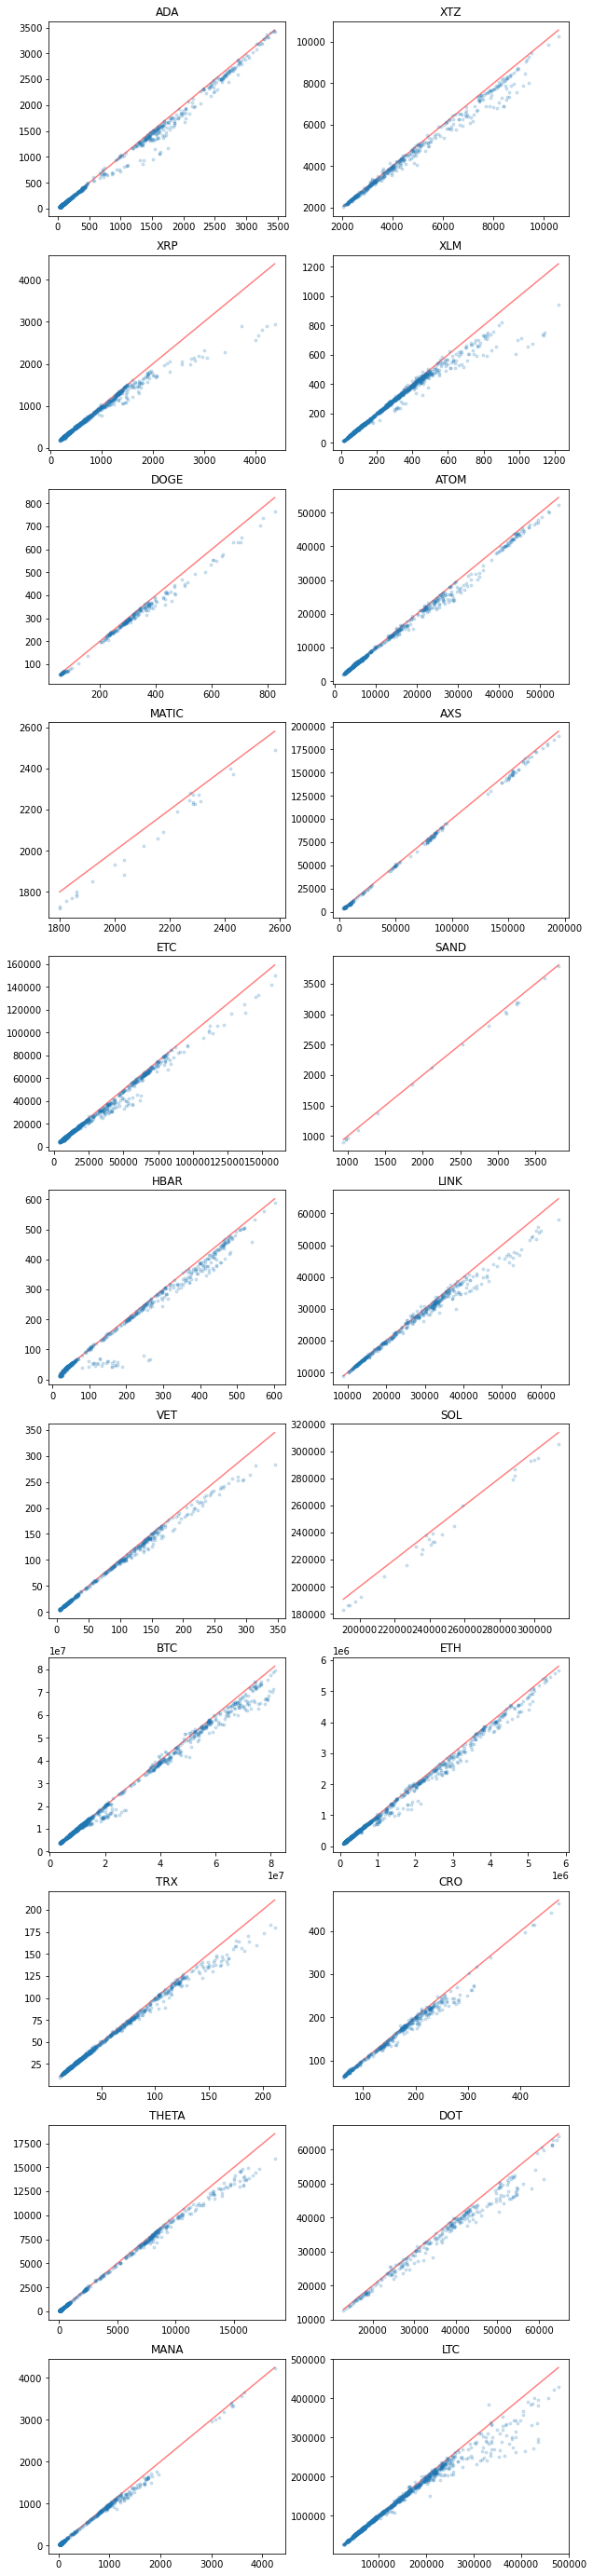

In [36]:
plt.figure(figsize=(10, 50))
for n, code in enumerate(merged_df.Code.unique()):
    plt.subplot(11, 2, n + 1)
    
    lims = [
        np.min([merged_df[merged_df.Code == code]['Price_upbit'].min().min(),
                 merged_df[merged_df.Code == code]['Price_upbit'].min().min()]),
        np.min([merged_df[merged_df.Code == code]['Price_upbit'].max().max(),
                 merged_df[merged_df.Code == code]['Price_upbit'].max().max()]),
    ]
    
    plt.plot(lims, lims, 'r-', alpha=0.5, zorder=0)
    
    plt.scatter(merged_df[merged_df.Code == code]['Price_upbit'], merged_df[merged_df.Code == code]['Price_inves_won'],
                s=8, alpha=0.2)
    plt.title(code)
plt.show()

## 기간별 프리미엄 확인

In [37]:
merged_df['KimP']  = merged_df['Price_upbit'] / merged_df['Price_inves_won']

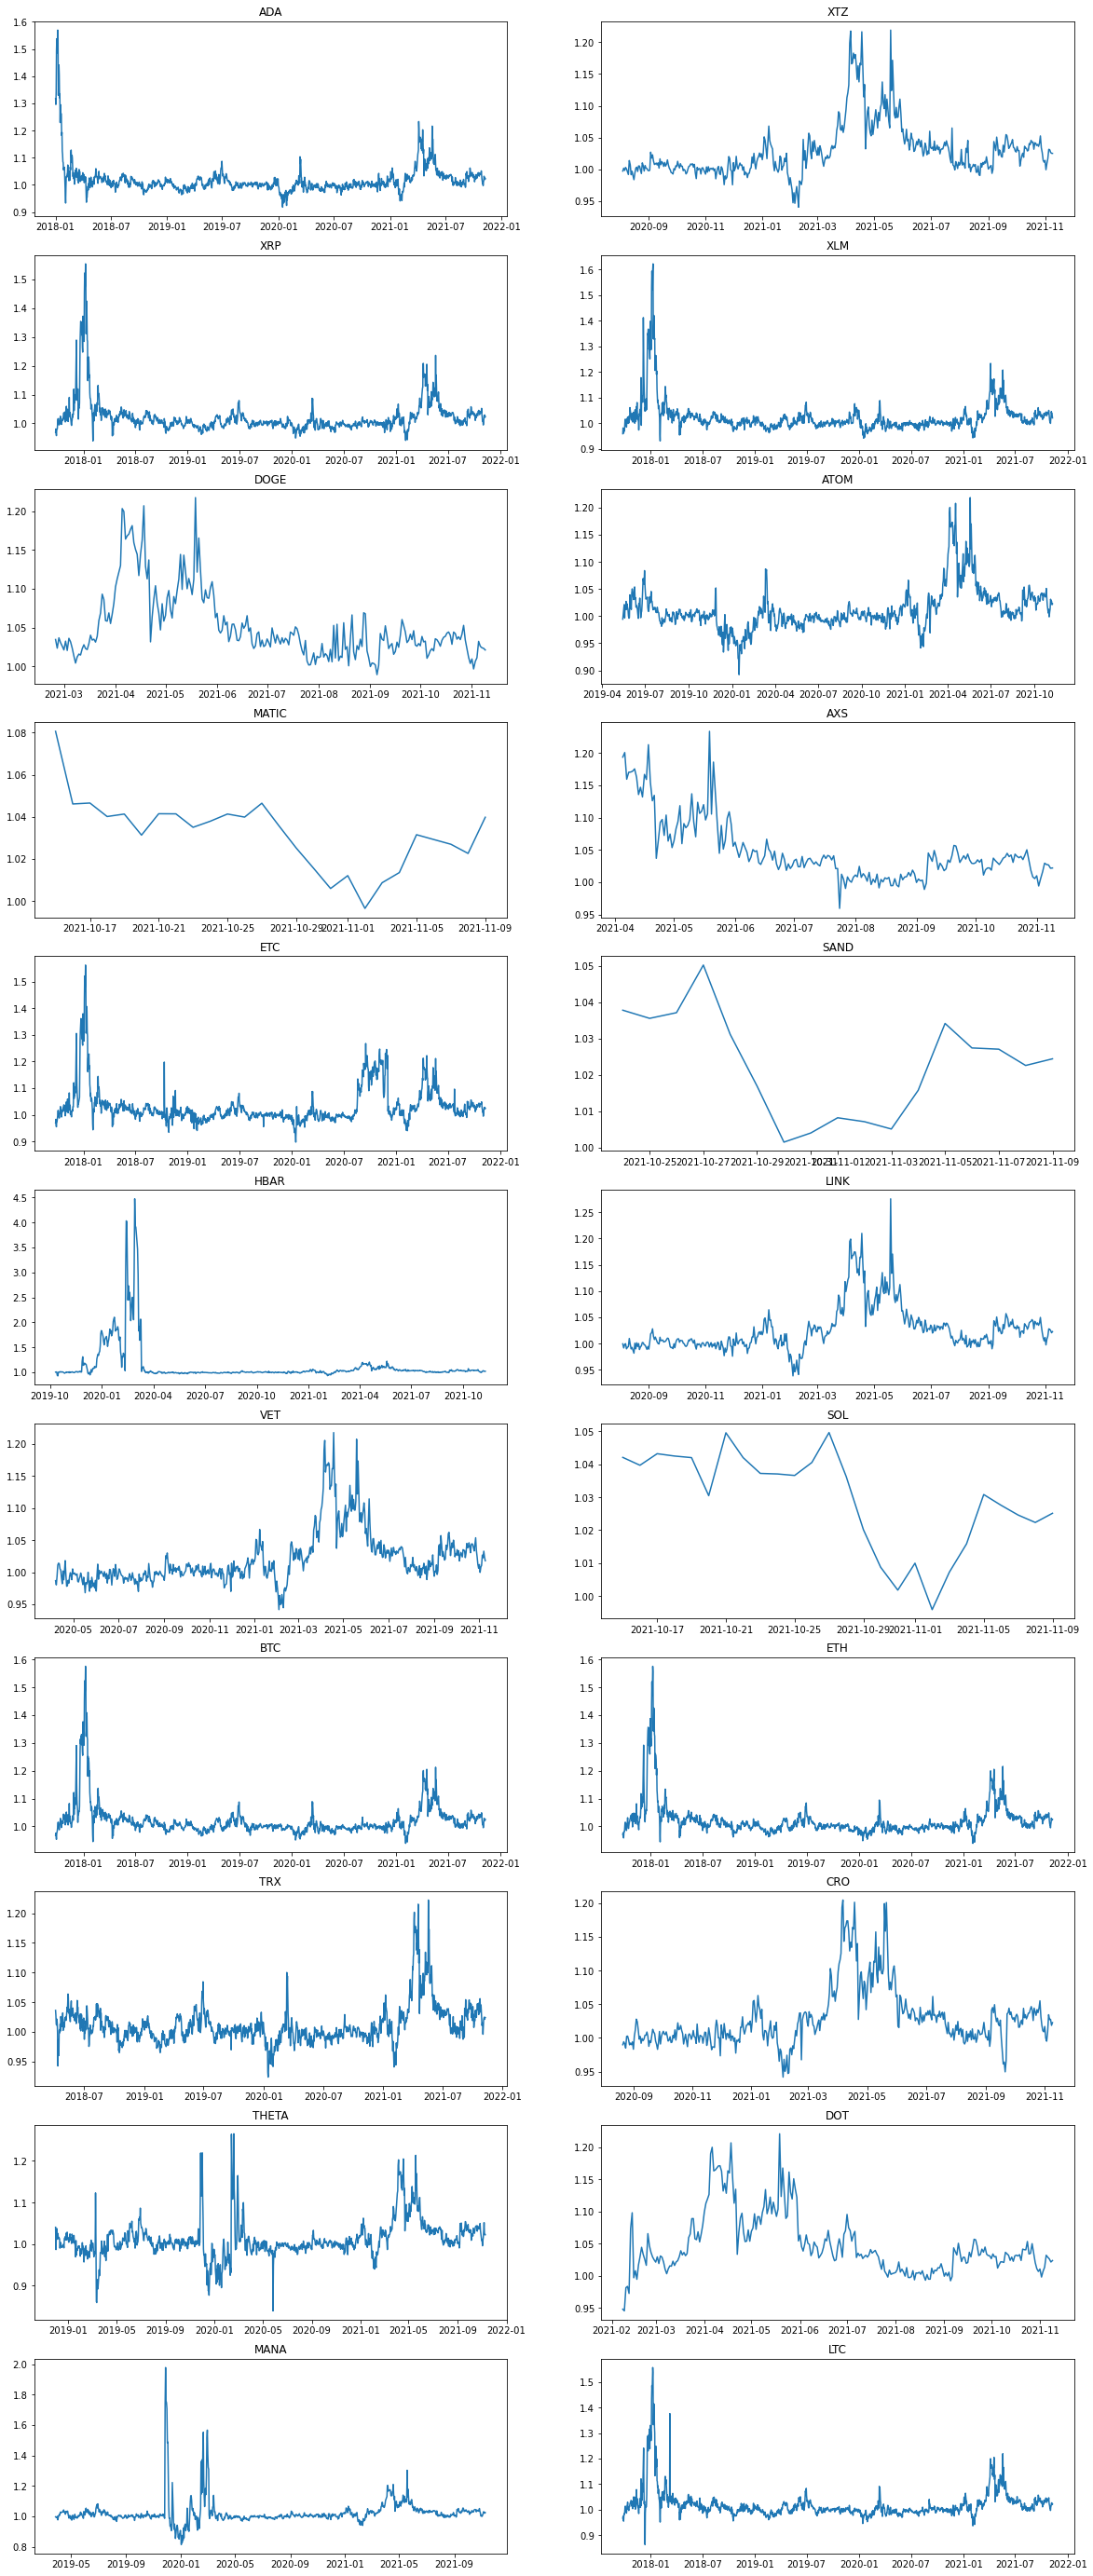

In [38]:
plt.figure(figsize=(20, 50))
for n, code in enumerate(merged_df.Code.unique()):
    plt.subplot(11, 2, n + 1)
    
    temp_df = merged_df[merged_df.Code == code]
    
    plt.plot(temp_df.index, temp_df['KimP'])
    plt.title(code)
plt.show()

## 프리미엄 변동과 주가 변동 확인

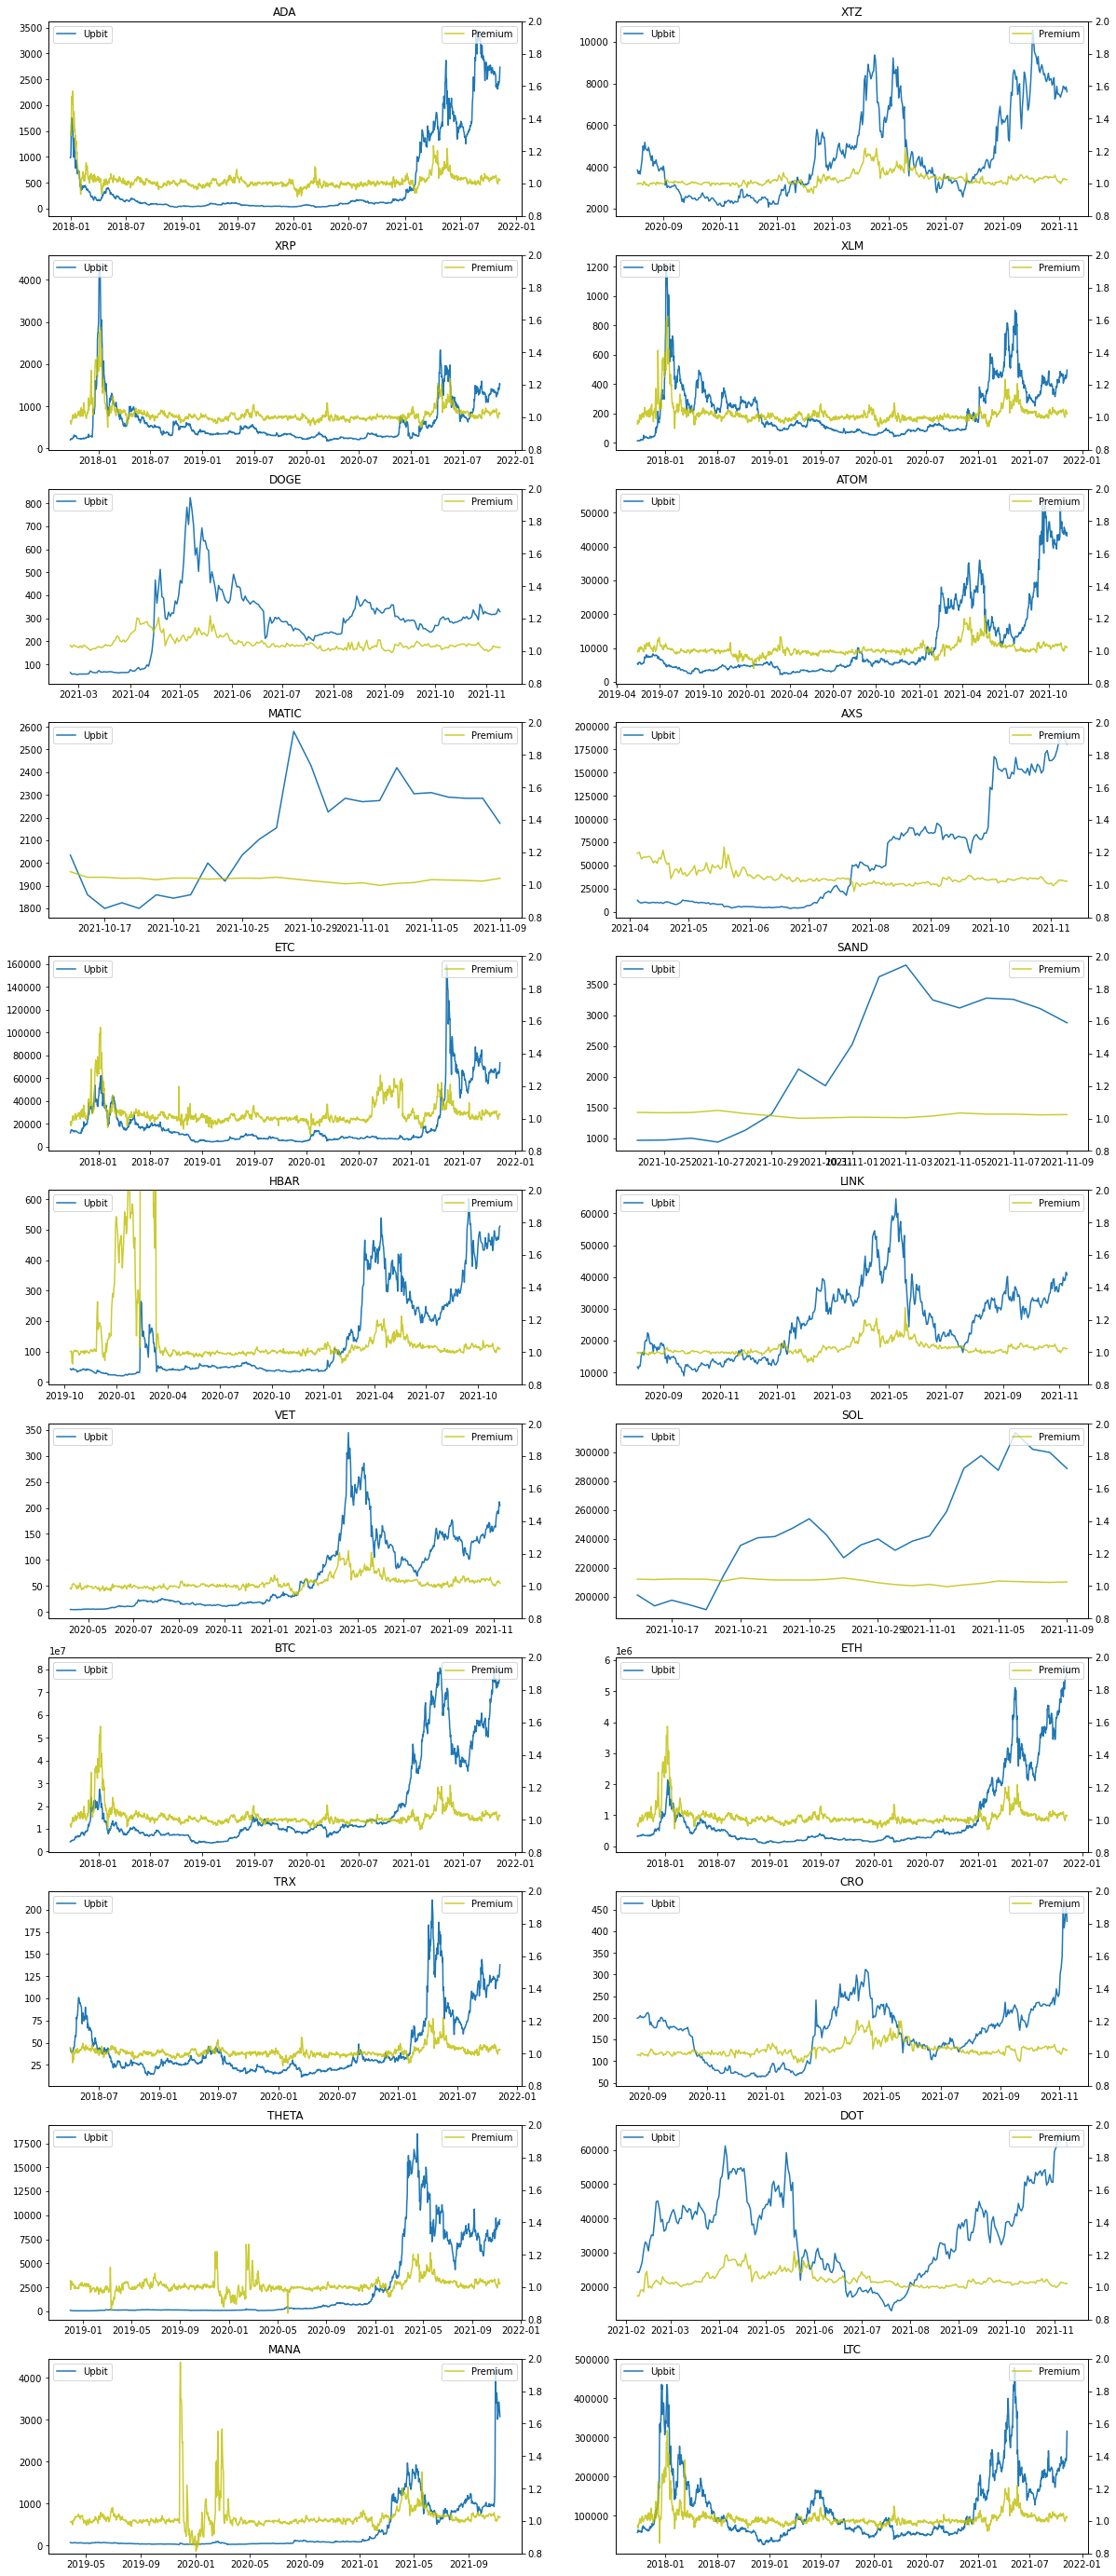

In [39]:
plt.figure(figsize=(20, 50))
for n, code in enumerate(merged_df.Code.unique()):
    ax1 = plt.subplot(11, 2, n + 1)
    
    temp_df = merged_df[merged_df.Code == code]
    
    ax1.plot(temp_df.index, temp_df['Price_upbit'], label='Upbit')
    
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(temp_df.index, temp_df['KimP'], 'y-', alpha=0.8, label='Premium')
    ax2.set_ylim(0.8, 2.0)
    
    ax2.legend()
    plt.title(code)
plt.show()

## RandomForest 모델을 통한 확인

In [40]:
from sklearn.ensemble import RandomForestRegressor

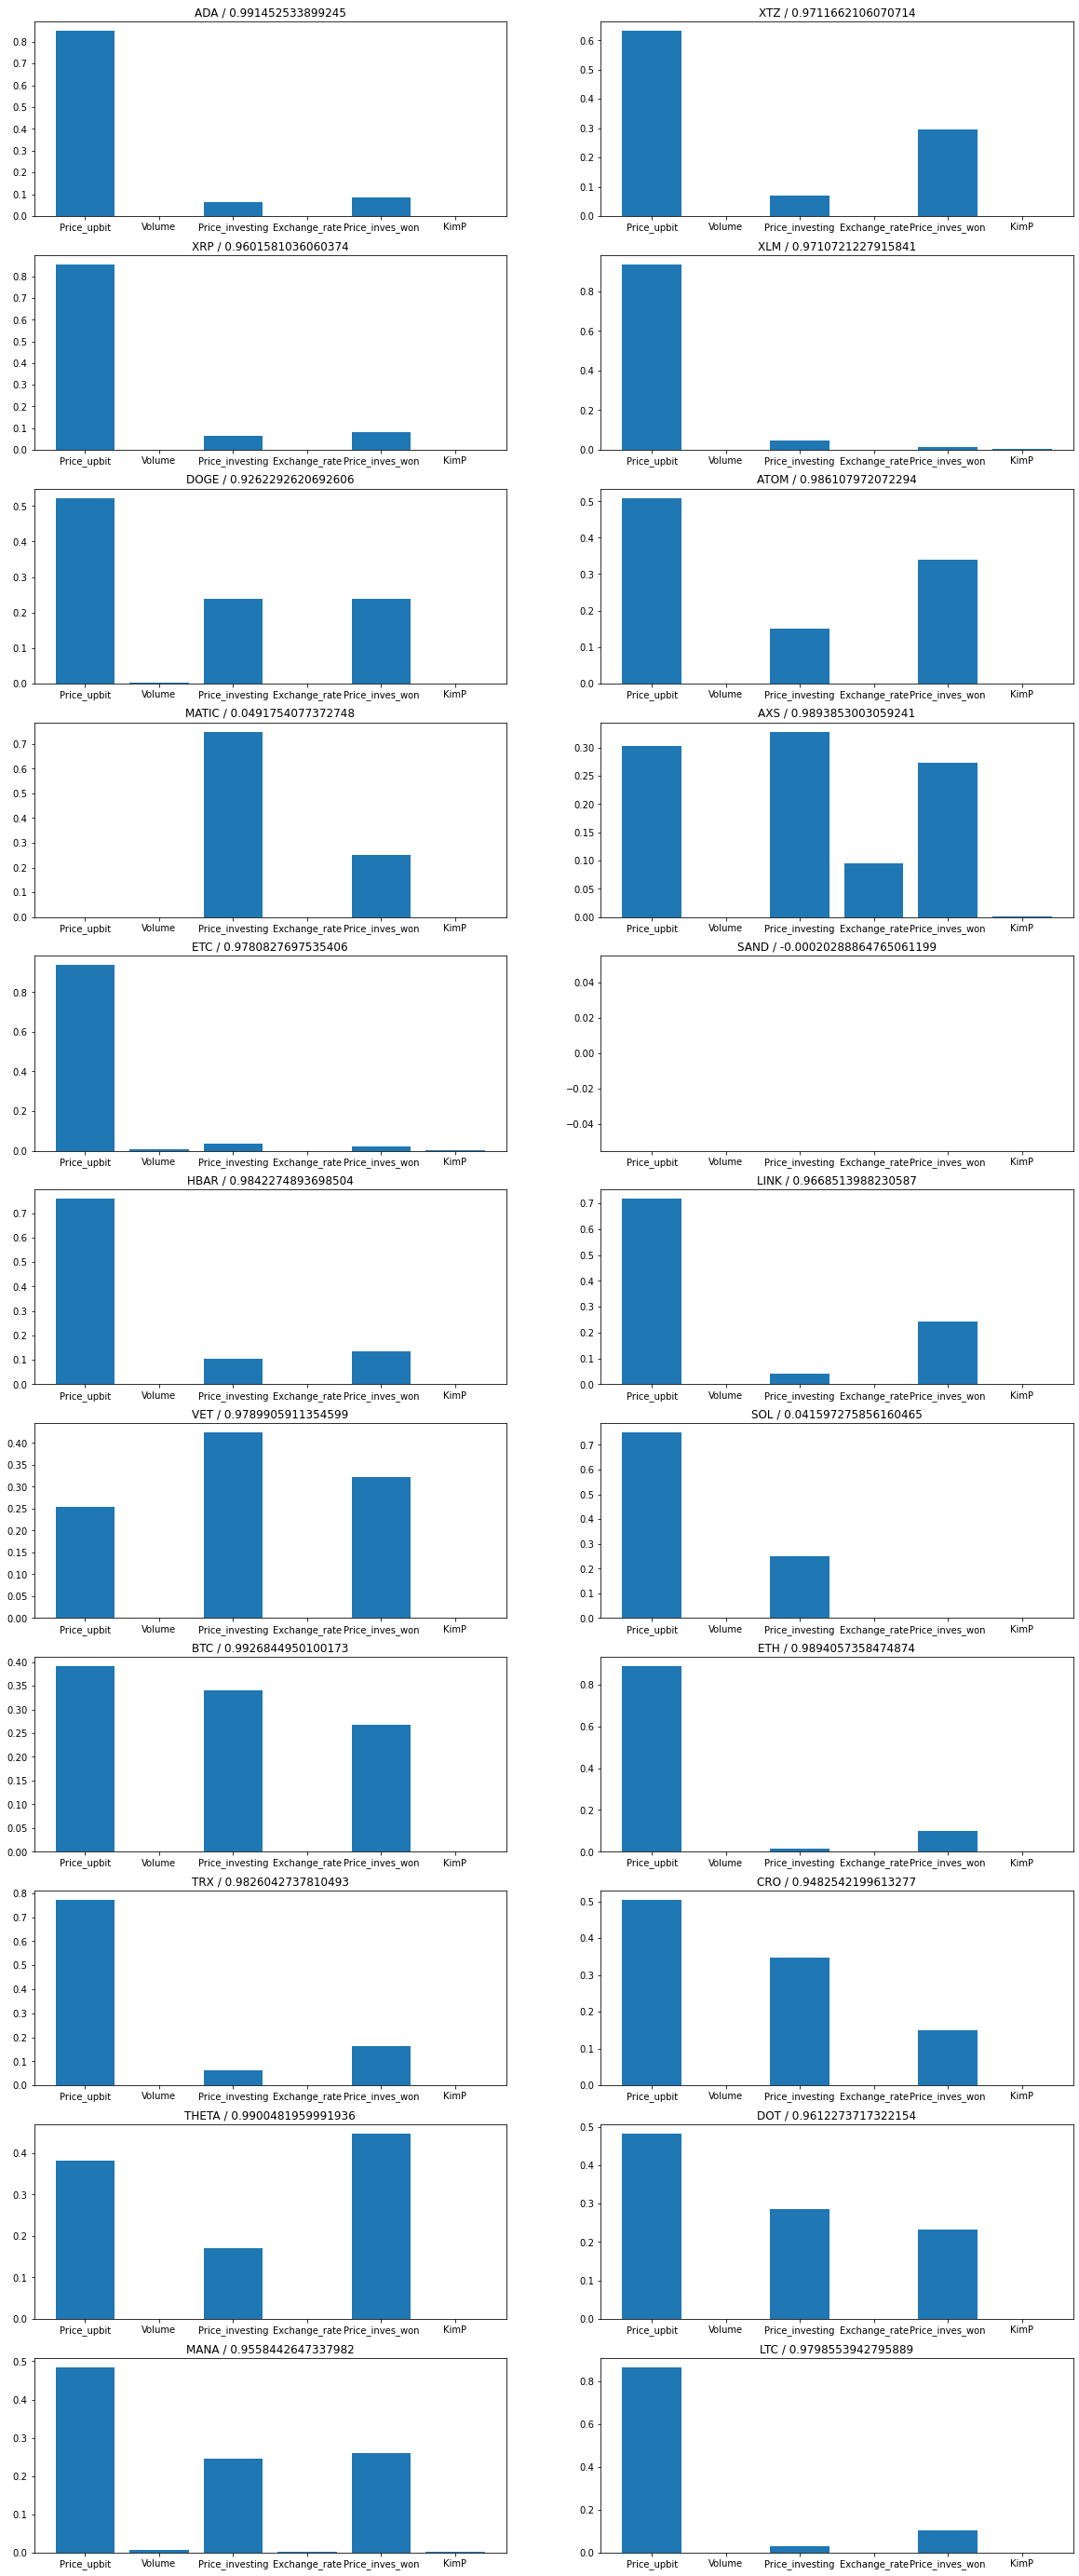

In [41]:
plt.figure(figsize=(20, 50))

for n, code in enumerate(merged_df.Code.unique()):
    plt.subplot(11, 2, n + 1)
    
    temp_df = merged_df[merged_df.Code == code]
    temp_df['target'] = temp_df.Price_upbit.shift(-1)
    temp_df.dropna(inplace=True)
    
    rfc = RandomForestRegressor(max_depth=3, min_samples_leaf=10, random_state=14)
    rfc.fit(temp_df.drop(['target', 'Code', 'Name'], axis=1), temp_df.target)
    
    d = dict(zip(temp_df.drop(['target', 'Code', 'Name'], axis=1).columns, rfc.feature_importances_))
    plt.bar(list(d.keys()), d.values())
    score = rfc.score(temp_df.drop(['target', 'Code', 'Name'], axis=1), temp_df.target)
    title = '{} / {}'.format(code, score)
    plt.title(title)

plt.show()